In [1]:
!pip install ultralytics opencv-python matplotlib rarfile
!apt-get install unrar -y


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [2]:
import os
import cv2
import rarfile
import zipfile
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
dataset_file = "/content/drive/MyDrive/0 anomaly dataset.rar"

import rarfile
with rarfile.RarFile(dataset_file) as rf:
    rf.extractall("/content/dataset")


In [5]:
extract_path = "/content/dataset"
os.makedirs(extract_path, exist_ok=True)

if dataset_file.endswith(".rar"):
    with rarfile.RarFile(dataset_file) as rf:
        rf.extractall(extract_path)
        print("RAR extracted")

elif dataset_file.endswith(".zip"):
    with zipfile.ZipFile(dataset_file, 'r') as zf:
        zf.extractall(extract_path)
        print("ZIP extracted")

print("Dataset extracted to:", extract_path)


RAR extracted
Dataset extracted to: /content/dataset


In [6]:
YOLO("yolov8s.pt")


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [7]:
def show_image(img):
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [8]:
def detect_objects(image_path):
    print("Processing:", image_path)

    # Run YOLO Detection
    results = model(image_path)
    result = results[0]

    # Read Image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Loop Through Detected Boxes
    for box in result.boxes:
        cls_id = int(box.cls[0])
        confidence = float(box.conf[0])
        label = model.names[cls_id]

        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Draw Rectangle
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Draw Label
        text = f"{label} {confidence:.2f}"
        cv2.putText(img, text, (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (255,0,0), 2)

    show_image(img)


In [9]:
image_paths = []

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            image_paths.append(os.path.join(root, file))

print("Total images found:", len(image_paths))


Total images found: 6637


In [11]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
print("Model Loaded Successfully")


Model Loaded Successfully


Processing: /content/dataset/0 anomaly dataset/running/frame000025 (17).jpg

image 1/1 /content/dataset/0 anomaly dataset/running/frame000025 (17).jpg: 480x640 3 persons, 1 cat, 517.4ms
Speed: 36.6ms preprocess, 517.4ms inference, 52.3ms postprocess per image at shape (1, 3, 480, 640)


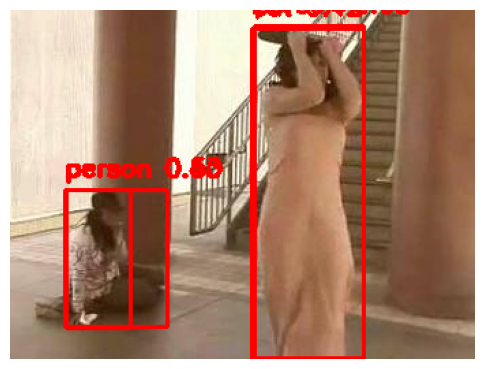

Processing: /content/dataset/0 anomaly dataset/running/frame000031 (14).jpg

image 1/1 /content/dataset/0 anomaly dataset/running/frame000031 (14).jpg: 480x640 (no detections), 222.4ms
Speed: 16.3ms preprocess, 222.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


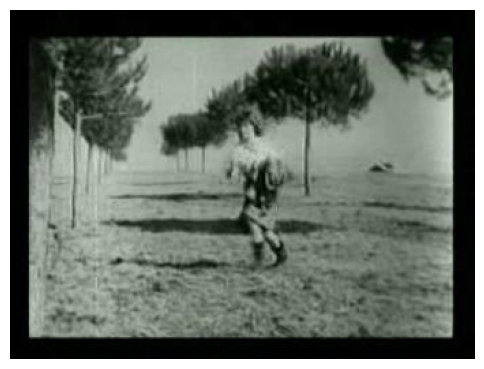

Processing: /content/dataset/0 anomaly dataset/running/frame000049.jpg

image 1/1 /content/dataset/0 anomaly dataset/running/frame000049.jpg: 384x640 1 person, 217.1ms
Speed: 3.0ms preprocess, 217.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


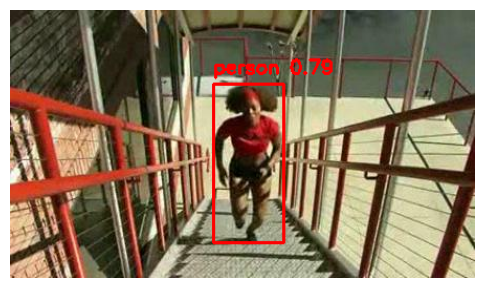

Processing: /content/dataset/0 anomaly dataset/running/frame000109.jpg

image 1/1 /content/dataset/0 anomaly dataset/running/frame000109.jpg: 448x640 1 person, 222.7ms
Speed: 3.7ms preprocess, 222.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


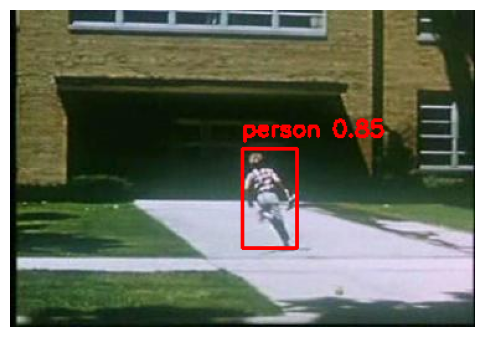

Processing: /content/dataset/0 anomaly dataset/running/frame000023 (14).jpg

image 1/1 /content/dataset/0 anomaly dataset/running/frame000023 (14).jpg: 480x640 1 person, 2 cars, 212.1ms
Speed: 3.6ms preprocess, 212.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


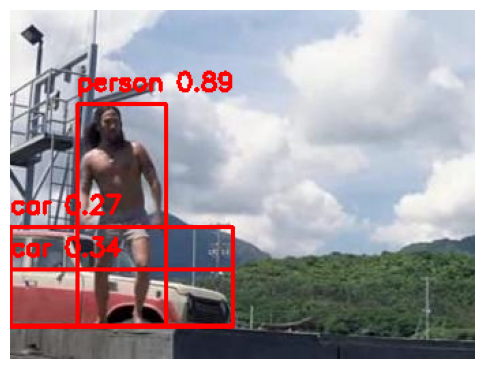

Processing: /content/dataset/0 anomaly dataset/running/frame000017 (6).jpg

image 1/1 /content/dataset/0 anomaly dataset/running/frame000017 (6).jpg: 448x640 1 person, 204.0ms
Speed: 3.5ms preprocess, 204.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


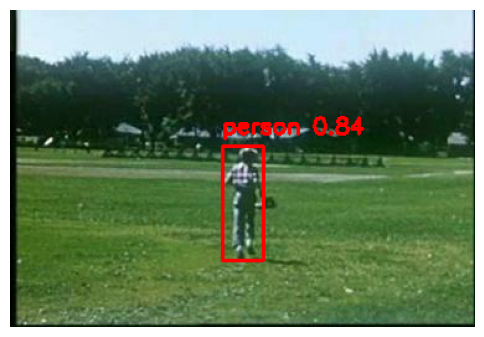

Processing: /content/dataset/0 anomaly dataset/running/frame000114.jpg

image 1/1 /content/dataset/0 anomaly dataset/running/frame000114.jpg: 448x640 1 person, 202.5ms
Speed: 5.2ms preprocess, 202.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


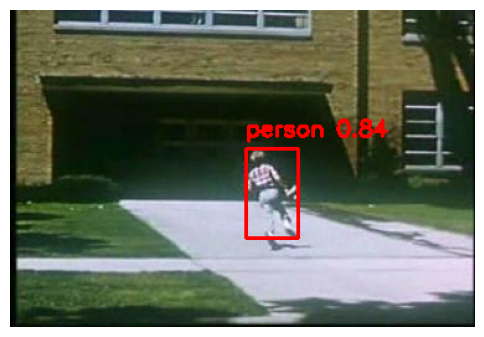

Processing: /content/dataset/0 anomaly dataset/running/frame000073 (3).jpg

image 1/1 /content/dataset/0 anomaly dataset/running/frame000073 (3).jpg: 480x640 1 person, 238.9ms
Speed: 18.1ms preprocess, 238.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


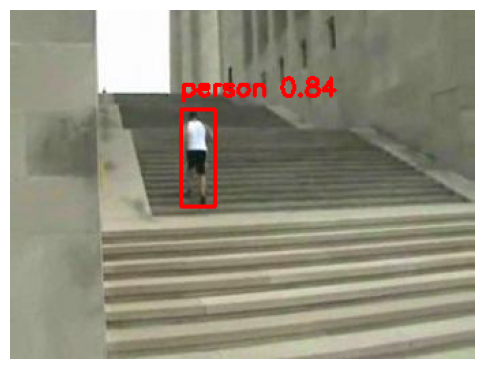

Processing: /content/dataset/0 anomaly dataset/running/frame000007 (5).jpg

image 1/1 /content/dataset/0 anomaly dataset/running/frame000007 (5).jpg: 384x640 (no detections), 195.2ms
Speed: 3.1ms preprocess, 195.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


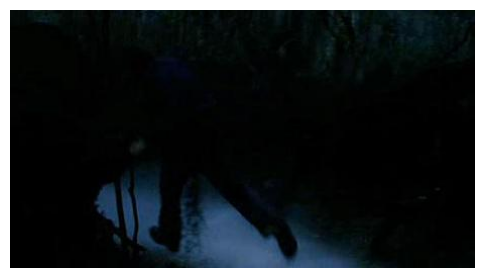

Processing: /content/dataset/0 anomaly dataset/running/frame000004 (5).jpg

image 1/1 /content/dataset/0 anomaly dataset/running/frame000004 (5).jpg: 384x640 (no detections), 170.3ms
Speed: 3.3ms preprocess, 170.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


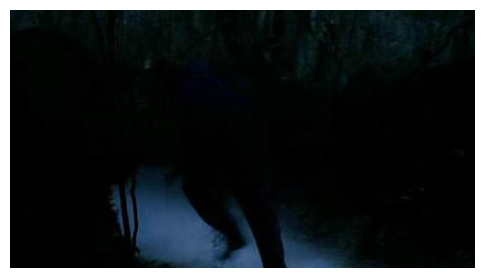

In [12]:
for img_path in image_paths[:10]:  # limit first 10 images for demo
    detect_objects(img_path)
